<a href="https://colab.research.google.com/github/utkarshg1/Test1/blob/main/RegressionModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regression in Keras

Make sure you use GPU runtime

Runtime > Change Runtime Type > T4 GPU

## Step 1 - Data Ingestion

In [1]:
url = "https://raw.githubusercontent.com/utkarshg1/Neural-Net-Datasets/refs/heads/main/PowerPlant.csv"
print(url)

https://raw.githubusercontent.com/utkarshg1/Neural-Net-Datasets/refs/heads/main/PowerPlant.csv


In [2]:
import pandas as pd
df = pd.read_csv(url)
df.head()

,AT,V,AP,RH,PE
0,8.34,40.77,1010.84,90.01,480.48
1,23.64,58.49,1011.40,74.20,445.75
2,29.74,56.90,1007.15,41.91,438.76
3,19.07,49.69,1007.22,76.79,453.09
4,11.80,40.66,1017.13,97.20,464.43


### Target feature is PE - Power Plant energy op in MW
1. AT - Atmospheric Temperature degree Celsius
2. V - Vaccuum Pressre of Boiler
3. AP - Atmospheric Pressure
4. RH - Relative Humidity

### Step 2 - Perform basic data quality checks

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   PE      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


In [4]:
df.isna().sum()

,0
AT,0
V,0
AP,0
RH,0
PE,0


In [5]:
df.duplicated().sum()

np.int64(41)

In [6]:
df = df.drop_duplicates(keep="first").reset_index(drop=True)
df.shape

(9527, 5)

### Step 3 - Seperate X and Y(PE)

In [7]:
X = df.drop(columns = ["PE"])
Y = df[["PE"]]

In [8]:
X.head()

,AT,V,AP,RH
0,8.34,40.77,1010.84,90.01
1,23.64,58.49,1011.40,74.20
2,29.74,56.90,1007.15,41.91
3,19.07,49.69,1007.22,76.79
4,11.80,40.66,1017.13,97.20


In [9]:
Y.head()

,PE
0,480.48
1,445.75
2,438.76
3,453.09
4,464.43


### Step 4 - Apply Preprocessing on X

In [10]:
X.dtypes

,0
AT,float64
V,float64
AP,float64
RH,float64


In [11]:
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [12]:
num_pipe = make_pipeline(
    SimpleImputer(strategy="median"),
    StandardScaler()
).set_output(transform="pandas")

In [13]:
X_pre = num_pipe.fit_transform(X)
X_pre.head()

,AT,V,AP,RH
0,-1.520448,-1.066041,-0.403535,1.141599
1,0.534897,0.330813,-0.309262,0.059223
2,1.354348,0.205475,-1.024725,-2.151400
3,-0.079020,-0.362884,-1.012941,0.236538
4,-1.055645,-1.074713,0.655349,1.633837


### Step 5 - Train test split

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
xtrain, xtest, ytrain, ytest = train_test_split(X_pre, Y, test_size=0.2, random_state=42)

In [16]:
xtrain.head()

,AT,V,AP,RH
5695,-0.152905,0.324507,0.089713,1.817999
7300,-1.497611,-1.153542,0.323712,0.908830
9066,-0.885038,-0.954892,0.293410,0.988245
6424,1.398679,1.223949,-0.479290,-1.082031
6773,-0.824586,-0.942279,0.796758,1.506499


In [17]:
ytrain.head()

,PE
5695,446.68
7300,483.54
9066,461.71
6424,437.38
6773,463.71


In [18]:
xtest.head()

,AT,V,AP,RH
1087,1.827212,1.120683,-0.125767,-1.414069
6308,-1.501641,-1.244984,0.044260,-0.467246
8021,-1.465370,-1.418408,0.399466,-1.082031
9483,0.150695,0.648495,0.731104,-0.002393
4459,-0.036032,1.128565,-0.361449,1.586599


In [19]:
ytest.head()

,PE
1087,429.38
6308,485.29
8021,480.40
9483,452.30
4459,446.47


In [20]:
xtrain.shape

(7621, 4)

In [21]:
xtest.shape

(1906, 4)

In [22]:
xtrain.shape[1]

4

### Step 6 - Build neural network with tensorflow keras

In [23]:
from keras.models import Sequential
from keras.layers import Input, Dense

In [24]:
model  = Sequential(
    [
        Input(shape= (xtrain.shape[1],) ),
        Dense(8, activation="relu"),
        Dense(4, activation="relu"),
        Dense(1, activation="linear")
    ]
)

In [25]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 8)              │            40 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 81 (324.00 B)

 Trainable params: 81 (324.00 B)

 Non-trainable params: 0 (0.00 B)

In [26]:
# Compile the model
model.compile(loss="mse", optimizer="adam", metrics=["mae"])

In [27]:
# Fit the model
hist = model.fit(xtrain, ytrain, epochs=60, validation_split=0.2)

Epoch 1/60
191/191 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 206280.3750 - mae: 453.8437 - val_loss: 203215.9219 - val_mae: 450.4116
Epoch 2/60
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 202904.5156 - mae: 450.0603 - val_loss: 192933.3281 - val_mae: 438.6855
Epoch 3/60
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 188926.1094 - mae: 433.9612 - val_loss: 165556.5938 - val_mae: 405.3088
Epoch 4/60
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 158555.8594 - mae: 395.9543 - val_loss: 123936.0938 - val_mae: 346.3851
Epoch 5/60
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 115586.9766 - mae: 332.5250 - val_loss: 81463.7969 - val_mae: 269.3193
Epoch 6/60
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 75173.9375 - mae: 257.3545 - val_loss: 48131.0273 - val_mae: 198.9027
Epoch 7/60
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 44653.0195 - mae: 190.7871 - val_loss: 29992.7637 - val_mae: 151.1813
Epoch 8/60
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 28415.8281 - mae: 146

## Visualize learning curve

In [28]:
import matplotlib.pyplot as plt

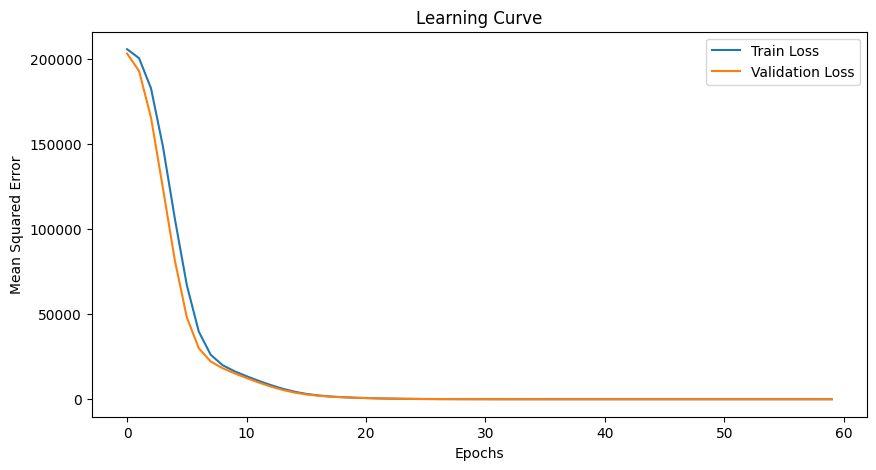

In [34]:
plt.figure(figsize=(10, 5))
plt.plot(hist.history["loss"], label="Train Loss")
plt.plot(hist.history["val_loss"], label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Mean Squared Error")
plt.title("Learning Curve")
plt.legend()
plt.show()

### Model trained properly as train and validation loss curves are moving togethor

### Model evaluation

In [35]:
model.evaluate(xtrain, ytrain)

239/239 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 20.4258 - mae: 3.6136


[20.50749397277832, 3.591175079345703]

In [36]:
model.evaluate(xtest, ytest)

60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 19.5722 - mae: 3.5585


[20.663372039794922, 3.628587484359741]

In [37]:
from sklearn.metrics import (
    root_mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score
)

In [38]:
def evaluate_model(model, x, y):
  ypred = model.predict(x)
  rmse = root_mean_squared_error(y, ypred)
  mae = mean_absolute_error(y, ypred)
  mape = mean_absolute_percentage_error(y, ypred)
  r2 = r2_score(y, ypred)
  print(f"RMSE : {rmse:.2f}")
  print(f"MAE : {mae:.2f}")
  print(f"MAPE : {mape:.2%}")
  print(f"R2 : {r2:.2%}")

In [39]:
print("Training Results")
evaluate_model(model, xtrain, ytrain)

Training Results
239/239 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
RMSE : 4.53
MAE : 3.59
MAPE : 0.79%
R2 : 92.87%


In [40]:
print("Testing Results")
evaluate_model(model, xtest, ytest)

Testing Results
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
RMSE : 4.55
MAE : 3.63
MAPE : 0.80%
R2 : 93.15%


### From above data model is good because R2 score > 0.8

### Out of sample prediction

In [41]:
url2 = "https://raw.githubusercontent.com/utkarshg1/Neural-Net-Datasets/refs/heads/main/test_PowerPlant.csv"
print(url2)

https://raw.githubusercontent.com/utkarshg1/Neural-Net-Datasets/refs/heads/main/test_PowerPlant.csv


In [42]:
xnew = pd.read_csv(url2)
xnew.head()

,AT,V,AP,RH
0,22.49,58.82,1009.73,85.19
1,28.88,54.89,1007.16,46.60
2,27.89,73.21,1001.32,85.88
3,25.69,62.26,1011.38,74.08
4,12.16,40.81,1025.79,70.97


In [43]:
num_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler())])

In [44]:
xnew_pre = num_pipe.transform(xnew)
xnew_pre

,AT,V,AP,RH
0,0.380410,0.356827,-0.590397,0.811615
1,1.238819,0.047028,-1.023041,-1.830315
2,1.105826,1.491180,-2.006171,0.858853
3,0.810286,0.628000,-0.312629,0.051007
4,-1.007284,-1.062888,2.113209,-0.161908
...,...,...,...,...
95,0.898948,1.197147,-0.805877,-0.196139
96,-1.058331,-1.129893,-0.314313,0.658261
97,-1.885843,-1.017956,1.291690,0.881445
98,0.712221,1.631496,-0.839546,0.491899


In [46]:
preds = model.predict(xnew_pre)
preds[0:5]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


array([[445.48776],
       [439.6939 ],
       [433.55844],
       [440.2665 ],
       [473.00162]], dtype=float32)

In [47]:
xnew["PE_pred"] = preds

In [48]:
xnew

,AT,V,AP,RH,PE_pred
0,22.49,58.82,1009.73,85.19,445.487762
1,28.88,54.89,1007.16,46.60,439.693909
2,27.89,73.21,1001.32,85.88,433.558441
3,25.69,62.26,1011.38,74.08,440.266510
4,12.16,40.81,1025.79,70.97,473.001617
...,...,...,...,...,...
95,26.35,69.48,1008.45,70.47,437.661041
96,11.78,39.96,1011.37,82.95,471.162018
97,5.62,41.38,1020.91,86.21,482.944672
98,24.96,74.99,1008.25,80.52,437.535461


In [49]:
xnew = xnew.round(2)

In [52]:
xnew.to_csv("RegResults.csv", index=False)

### Save model and preprocessor

In [53]:
import joblib
joblib.dump(num_pipe, "regpre.joblib")

['regpre.joblib']

In [54]:
model.save("regmodel.keras")

## Load preprocessor and model

In [55]:
p = joblib.load("regpre.joblib")

In [56]:
p

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler())])

In [57]:
from keras.models import load_model

In [58]:
m = load_model("regmodel.keras")

In [59]:
m.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 8)              │            40 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 245 (984.00 B)

 Trainable params: 81 (324.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 164 (660.00 B)